In [6]:
# Import labrary
import fbprophet
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
# Import dataset
df = pd.read_csv('daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [8]:
# Describe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [9]:
# Show the data in the last column
df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [10]:
# Rename column
df.columns = ['ds', 'y']

In [11]:
# Change the data format
df['ds'] = pd.to_datetime(df['ds'])  

In [12]:
# Split dataset
trainset = df[df['ds'].dt.year < 1989]
validset = df[(df['ds'].dt.year == 1989)]
testset = df[(df['ds'].dt.year == 1990)]

In [13]:
# Show the top of data
trainset.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [14]:
# Show the last of data
trainset.tail()

,ds,y
2915,1988-12-26,9.5
2916,1988-12-27,12.9
2917,1988-12-28,12.9
2918,1988-12-29,14.8
2919,1988-12-30,14.1


In [15]:
# Show the top of data
validset.head()

,ds,y
2920,1989-01-01,14.3
2921,1989-01-02,17.4
2922,1989-01-03,18.5
2923,1989-01-04,16.8
2924,1989-01-05,11.5


In [16]:
# Show the last of data
validset.tail()

,ds,y
3280,1989-12-27,13.3
3281,1989-12-28,11.7
3282,1989-12-29,10.4
3283,1989-12-30,14.4
3284,1989-12-31,12.7


In [17]:
# Show the top of data
testset.head()

,ds,y
3285,1990-01-01,14.8
3286,1990-01-02,13.3
3287,1990-01-03,15.6
3288,1990-01-04,14.5
3289,1990-01-05,14.3


In [18]:
# Show the last of data
testset.tail()

,ds,y
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [19]:
# create a library
def rmse(actual, predicted):
  return mean_squared_error(actual, predicted)**(1/2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

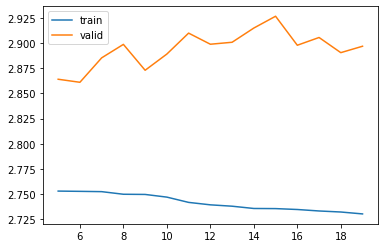

In [22]:
# Determine the value of yearly_seasonality
yearly_seasonality = np.arange(5, 20, 1)
a = yearly_seasonality
train = []
valid = []
for x in a:
  model = fbprophet.Prophet(yearly_seasonality=x)
  model.fit(trainset)
  y_train_pred = model.predict(trainset[['ds']])['yhat']
  y_valid_pred = model.predict(validset[['ds']])['yhat']

  train.append(rmse(trainset['y'], y_train_pred))
  valid.append(rmse(validset['y'], y_valid_pred))

sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

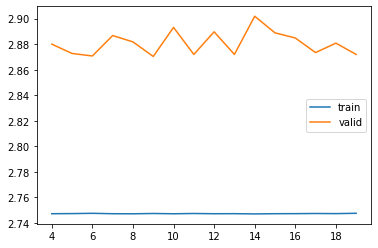

In [24]:
# Determine the value of weekly_seasonality
weekly_seasonality = np.arange(4,20,1)
a = weekly_seasonality
train = []
valid = []
for x in a:
  model = fbprophet.Prophet(yearly_seasonality=10, weekly_seasonality=x)
  model.fit(trainset)
  y_train_pred = model.predict(trainset[['ds']])['yhat']
  y_valid_pred = model.predict(validset[['ds']])['yhat']

  train.append(rmse(trainset['y'], y_train_pred))
  valid.append(rmse(validset['y'], y_valid_pred))

sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


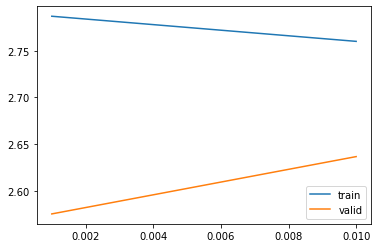

In [25]:
# Determine the value of changepoint_prior_scale
changepoint_prior_scale = [0.001, 0.01]
a = changepoint_prior_scale
train = []
valid = []
for x in a:
  model = fbprophet.Prophet(yearly_seasonality=10, weekly_seasonality=9, changepoint_prior_scale=x)
  model.fit(trainset)
  y_train_pred = model.predict(trainset[['ds']])['yhat']
  y_valid_pred = model.predict(validset[['ds']])['yhat']

  train.append(rmse(trainset['y'], y_train_pred))
  valid.append(rmse(validset['y'], y_valid_pred))

sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')

(3) Hitung RMSE hasil prediksi testset menggunakan optimized vs unoptimized model

In [26]:
# Setting dataset for training
prophet = fbprophet.Prophet(yearly_seasonality=True)
prophet.fit(trainset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
# Setting dataset with tuning for training
prophet_opt = fbprophet.Prophet(interval_width=0.95, yearly_seasonality=8, weekly_seasonality=8, changepoint_prior_scale=0.01)
prophet_opt.fit(trainset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# Predicted value
y_pred_test_d = prophet.predict(testset[['ds']])
y_pred_test_opt = prophet_opt.predict(testset[['ds']])

In [29]:
# Show the result
print('Unoptimized Model')
print(rmse(testset[['y']], y_pred_test_d['yhat']))
print('Optimized Model')
print(rmse(testset[['y']], y_pred_test_opt['yhat']))

Unoptimized Model
2.9578808519285067
Optimized Model
2.5461584075061783


Unoptimized Model

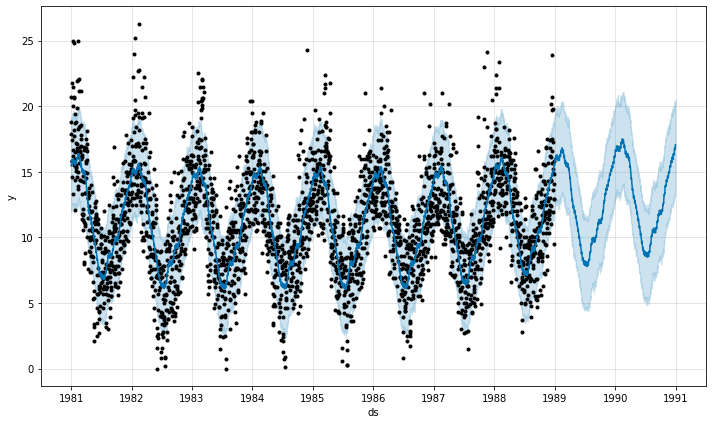

In [30]:
# Show the result
prophet.plot(prophet.predict(df[['ds']]))
plt.show()

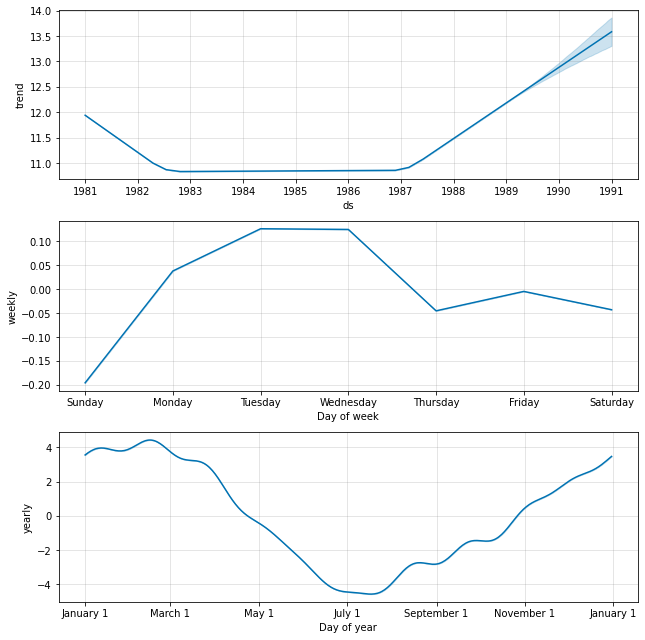

In [31]:
# Show the result
prophet.plot_components(prophet.predict(df[['ds']]))
plt.show()

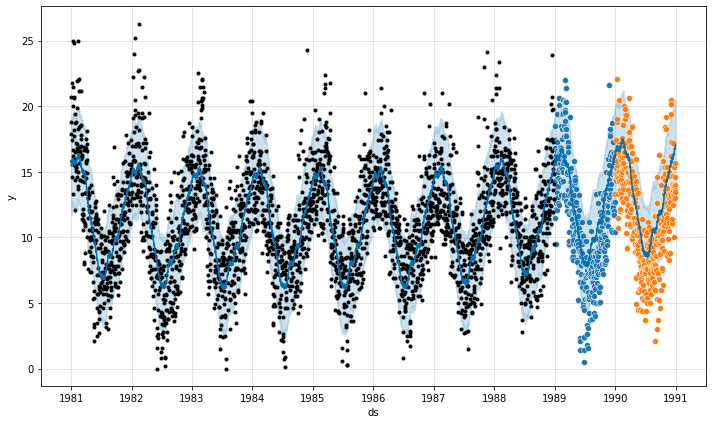

In [32]:
# Show the result
prophet.plot(prophet.predict(df[['ds']]))
sns.scatterplot(data=validset, x='ds', y='y')
sns.scatterplot(data=testset, x='ds', y='y')
plt.show()

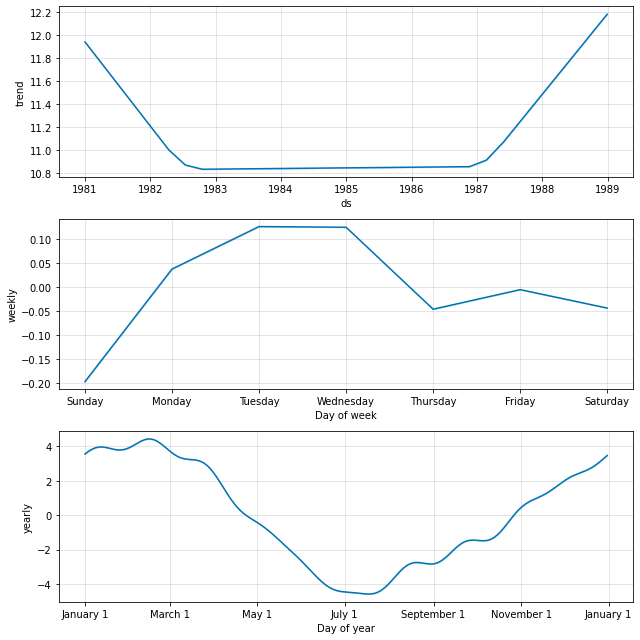

In [33]:
# Show the result
prophet.plot_components(prophet.predict(trainset[['ds']]))
plt.show()

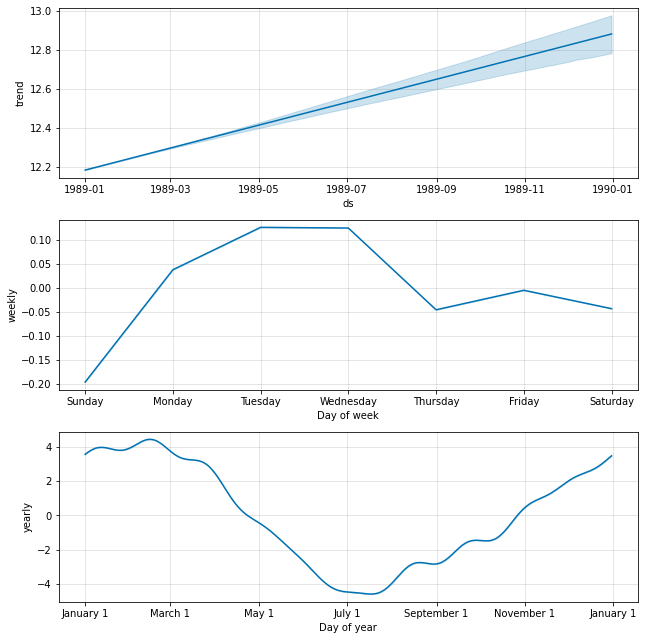

In [34]:
# Show the result
prophet.plot_components(prophet.predict(validset[['ds']]))
plt.show()

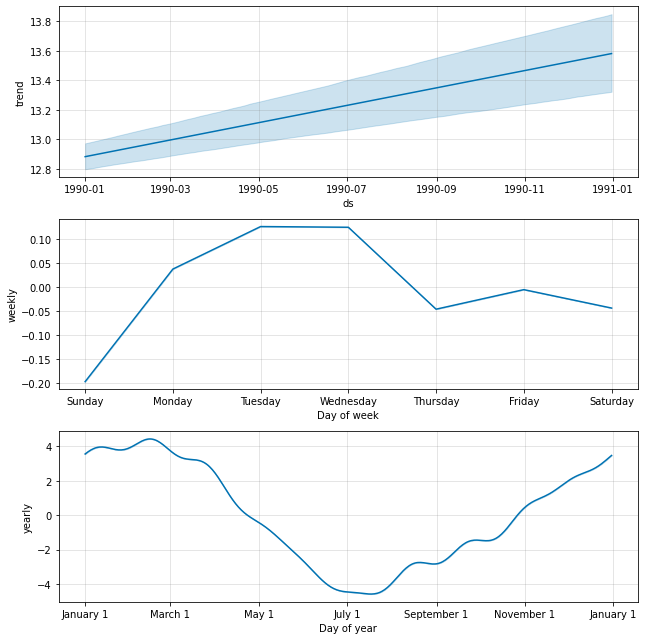

In [35]:
# Show the result
prophet.plot_components(prophet.predict(testset[['ds']]))
plt.show()

Optimized Model

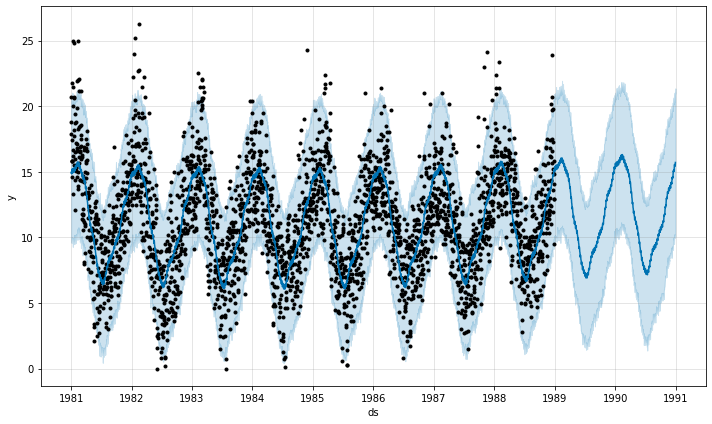

In [36]:
# Show the result with tuning
prophet_opt.plot(prophet_opt.predict(df[['ds']]))
plt.show()

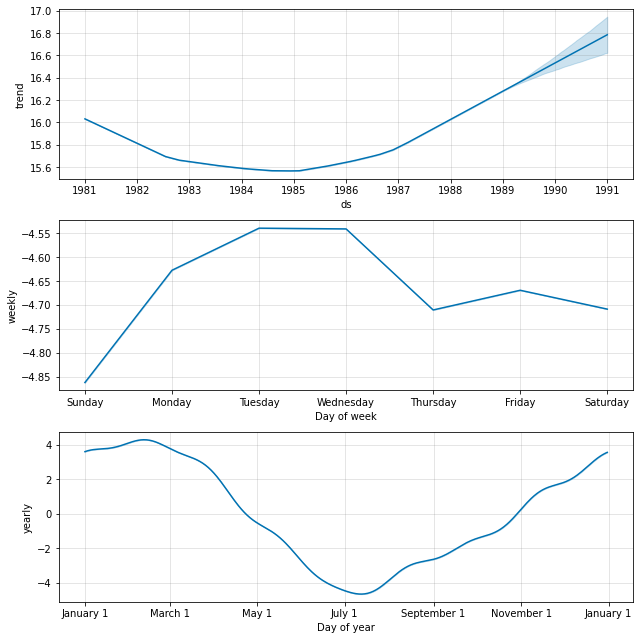

In [37]:
# Show the result with tuning
prophet_opt.plot_components(prophet_opt.predict(df[['ds']]))
plt.show()

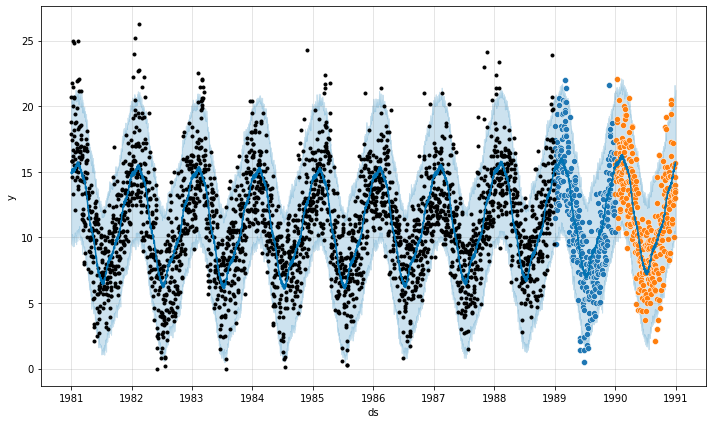

In [38]:
# Show the result with tuning
prophet_opt.plot(prophet_opt.predict(df[['ds']]))
sns.scatterplot(data=validset, x='ds', y='y')
sns.scatterplot(data=testset, x='ds', y='y')
plt.show()

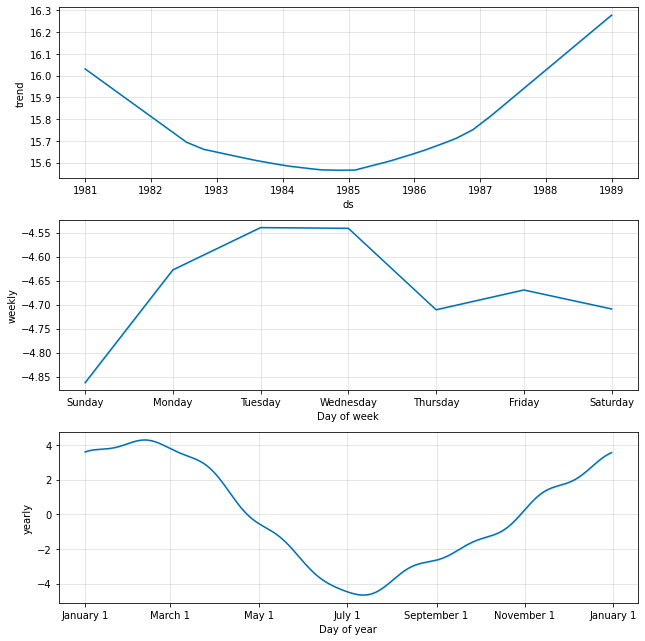

In [39]:
# Show the result with tuning
prophet_opt.plot_components(prophet_opt.predict(trainset[['ds']]))
plt.show()

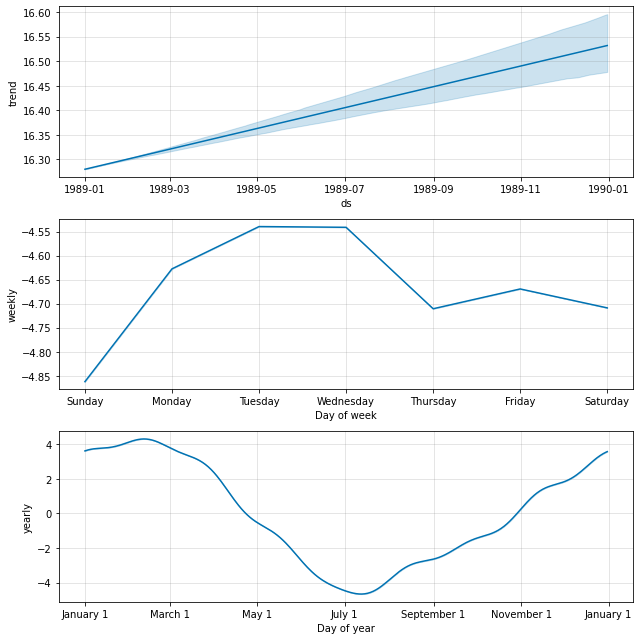

In [40]:
# Show the result with tuning
prophet_opt.plot_components(prophet_opt.predict(validset[['ds']]))
plt.show()

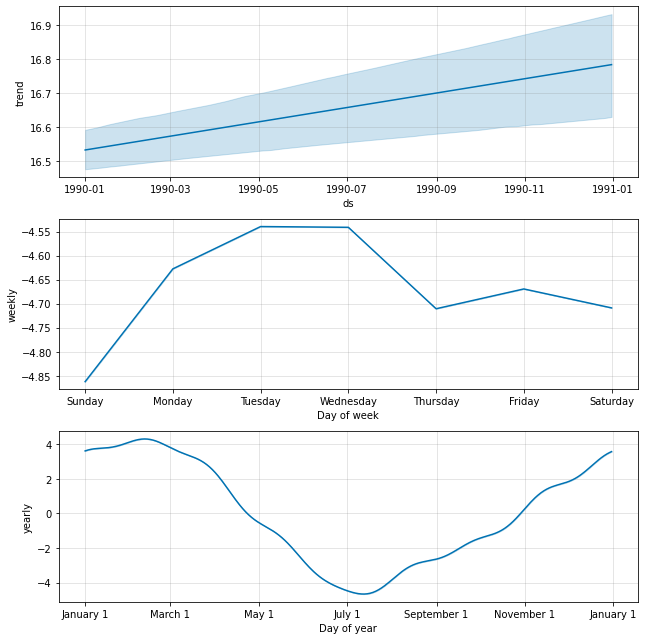

In [41]:
# Show the result with tuning
prophet_opt.plot_components(prophet_opt.predict(testset[['ds']]))
plt.show()

In [50]:
# predicted value for 1991 and 1992 in daily format
future = prophet.make_future_dataframe(1462, freq='d')

In [51]:
# Show the last data for future dataset
future.tail()

,ds
4377,1992-12-27
4378,1992-12-28
4379,1992-12-29
4380,1992-12-30
4381,1992-12-31


In [52]:
# Show the last data for df dataset (original dataset)
df.tail()

,ds,y
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


Unoptimized Model

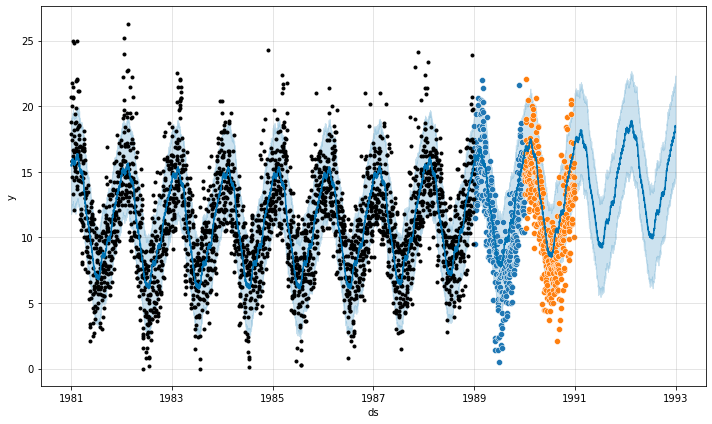

In [53]:
# Show the result of predicting value
prophet.plot(prophet.predict(future))
sns.scatterplot(data=validset, x='ds', y='y')
sns.scatterplot(data=testset, x='ds', y='y')
plt.show()

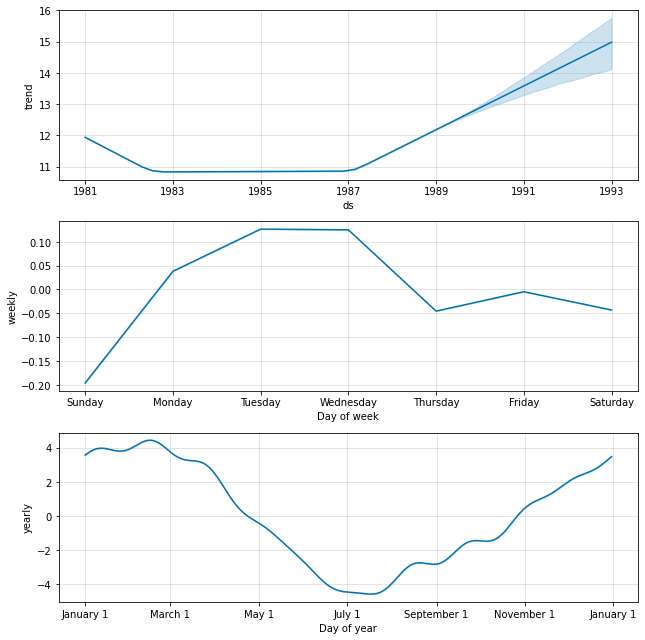

In [54]:
# Show the result of predicting value
prophet.plot_components(prophet.predict(future))
plt.show()

Optimized Model

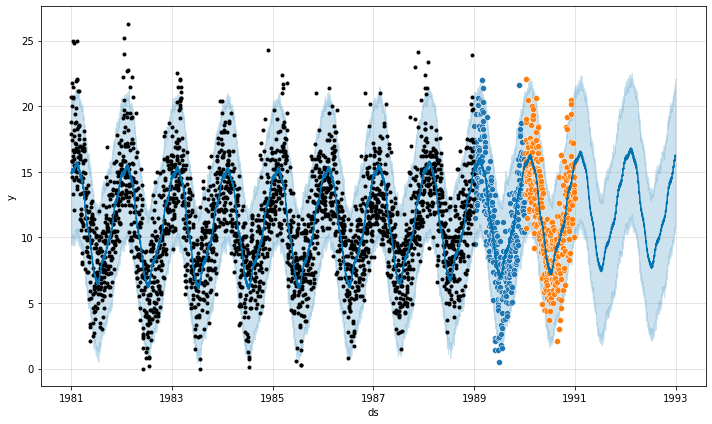

In [55]:
# Show the result of predicting value with tuning
prophet_opt.plot(prophet_opt.predict(future))
sns.scatterplot(data=validset, x='ds', y='y')
sns.scatterplot(data=testset, x='ds', y='y')
plt.show()

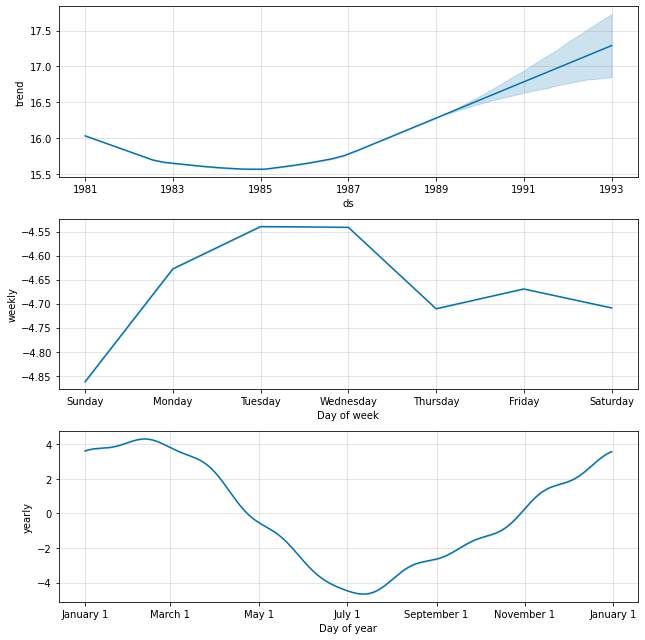

In [56]:
# Show the result of predicting value with tuning
prophet_opt.plot_components(prophet_opt.predict(future))
plt.show()